In [53]:
import spacy
import pandas as pd
import nltk
import numpy as np
import string
import emotion_analysis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

In [54]:
df = emotion_analysis.open_dataset('dataset.xlsx', 'xlsx')
df.Emoção = df.Emoção.str.lower()

In [55]:
df

,Comentarios,Emoção
0,Estou aqui para deixar minha análise ao Last D...,alegria
1,O jogo tem aproximadamente 4 horas de duração....,alegria
2,muito massa mano....gostei de mais....joguinho...,alegria
3,Que jogo maravilhoso! Zerado pela terceira vez...,alegria
4,A direção de arte desse jogo tá incrível,alegria
...,...,...
168,DETESTEI. Acho esse estilo de jogo super parad...,tristeza
169,"Cara que triste, mas ao mesmo tempo tão lindo ...",tristeza
170,"Acho esse estilo de jogo super parado e lento,...",tristeza
171,"Não é que o jogo é ruim, eu simplesmente não g...",tristeza


In [56]:

!python3 -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [57]:
nlp = spacy.load("pt_core_news_sm")

In [58]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [59]:
import string
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
def preprocessamento(text):
    result = []
    #pos_tag = ['ADJ', 'NOUN', 'VERB', 'PROPN'] # escolhendo apenas adjetivos, substantivos e verbos , 'VERB'
    pos_tag = ['ADJ', 'VERB']
    texto = re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', text )
    doc = nlp(texto.lower()) # Transformando em minúsculo
    for token in doc:
        # 3
        if(token.text in stop_words or token.text in pontuacoes):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)
                
        texto = ' '.join([str(elemento) for elemento in result if not elemento.isdigit()]) 
         
                
    #return result # 5
    return texto # 5



In [61]:


df.motivacao=df.Comentarios.astype(str)
df['limpa'] = df['Comentarios'].apply(preprocessamento)



In [62]:
df

,Comentarios,Emoção,limpa
0,Estou aqui para deixar minha análise ao Last D...,alegria,deixar análise last of june jogo emotivo jogue...
1,O jogo tem aproximadamente 4 horas de duração....,alegria,jogo horas duração trilha sonora perfeita narr...
2,muito massa mano....gostei de mais....joguinho...,alegria,massa manogostei maisjoguinho oh lindo lindo
3,Que jogo maravilhoso! Zerado pela terceira vez...,alegria,jogo maravilhoso zerado
4,A direção de arte desse jogo tá incrível,alegria,direção arte jogo incrível
...,...,...,...
168,DETESTEI. Acho esse estilo de jogo super parad...,tristeza,detestei acho estilo jogo parado lento saco fi...
169,"Cara que triste, mas ao mesmo tempo tão lindo ...",tristeza,cara triste lindo único
170,"Acho esse estilo de jogo super parado e lento,...",tristeza,acho estilo jogo parado lento saco ficar lendo...
171,"Não é que o jogo é ruim, eu simplesmente não g...",tristeza,jogo ruim gostei


In [63]:
motivo = df['limpa'].values
juntandotudo = ''
for sentimento in motivo:
  juntandotudo += sentimento+" "

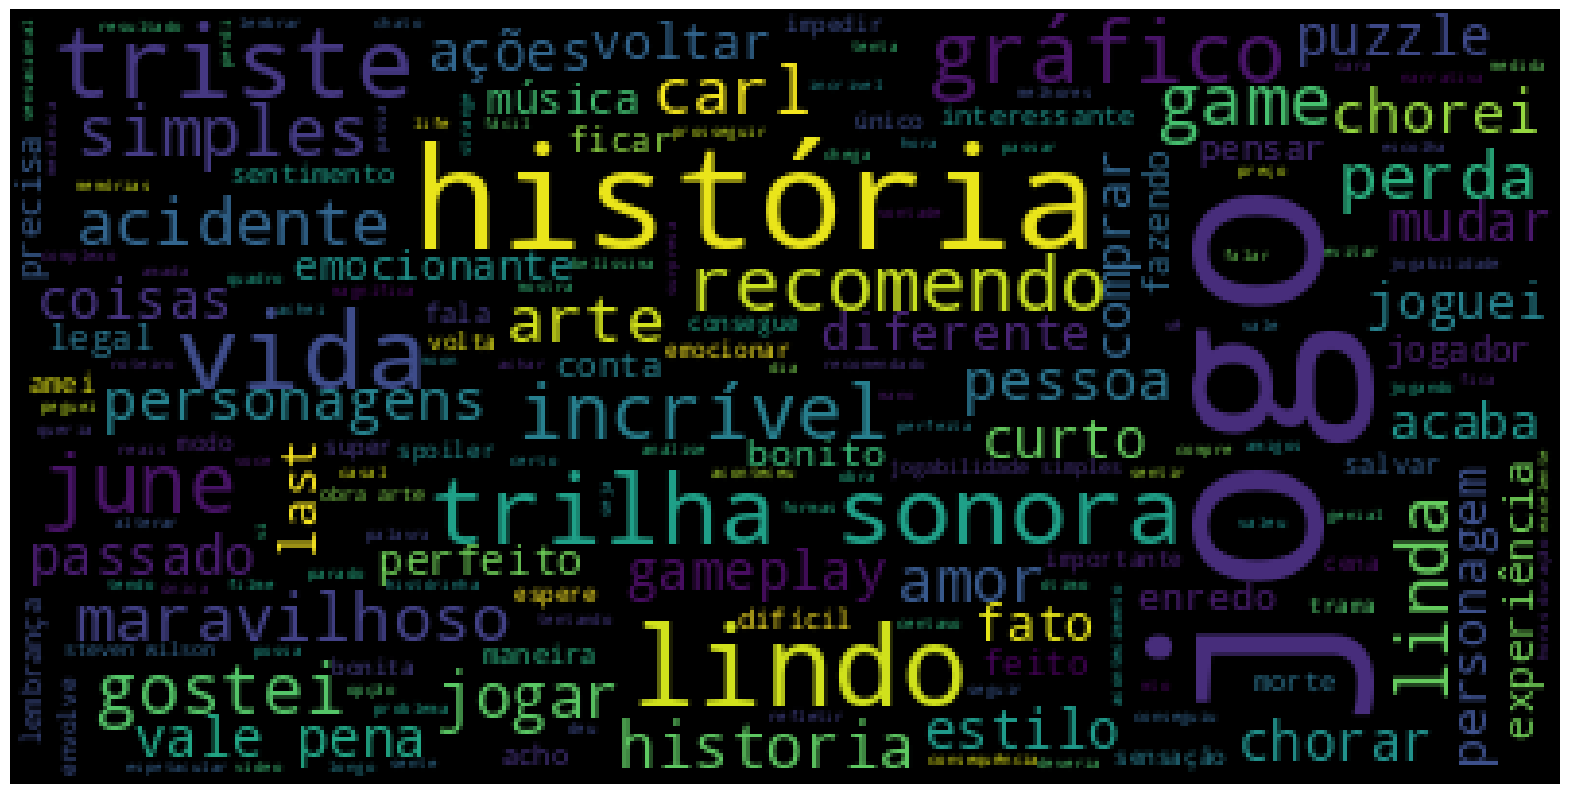

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(juntandotudo))